 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [2]:
#import pandas, numpy, datetime, Path, matplotlib
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
# Set CSV Path Locations for Files
whale_returns_csv = Path("./Resources/whale_returns.csv")
#Set Dataframes from Reading the CSV
whale_returns_df=pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [4]:
# Count nulls
# For each dataframe determine number of null data
whale_returns_df.count().isnull()

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC         False
dtype: bool

In [27]:
# Drop nulls
# False Values above are showing no nulls present. 
#To be certain we will do a drop of nulls to be sure data is clean.
whale_returns_df=whale_returns_df.dropna()
whale_returns_df.head()
#all null values removed 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns_csv=Path("./Resources/algo_returns.csv")
algo_returns_df=pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [8]:
# Count nulls
# For each dataframe determine number of null data
algo_returns_df.count().isnull()

Algo 1    False
Algo 2    False
dtype: bool

In [29]:
# Drop nulls
algo_returns_df=algo_returns_df.dropna()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv=Path("./Resources/sp500_history.csv")
sp500_history_df=pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [11]:
# Check Data Types
sp500_history_df.dtypes
#the column values are objects as the data type

Close    object
dtype: object

In [12]:
# Fix Data Types
#We need the close values to be floats withouth dollar sign
sp500_history_df["Close"]=sp500_history_df["Close"].str.replace("$","").astype("float")
sp500_history_df.head()
#change data type of close column to be a float and remove the $ symbol so it can read as float

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [20]:
# Calculate Daily Returns
#use pct_change function to dtermine the daily return on SP500
#rename the close column to SP500 return in sp500_daily_returns dataframe
sp500_returns=sp500_history_df.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [21]:
# Drop nulls
#use dropna and inplace=True to save dropping the NaN null values in data
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [22]:
# Rename Column
#rename the close column to SP500 return in sp500_daily_returns dataframe
columns=["SP500 Return"]
sp500_returns.columns=columns
sp500_returns.head()

,SP500 Return
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [31]:
# Concatenate all DataFrames into a single DataFrame
portfolio_returns=pd.concat([whale_returns_df,algo_returns_df,sp500_returns],axis="columns", join="inner")
portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

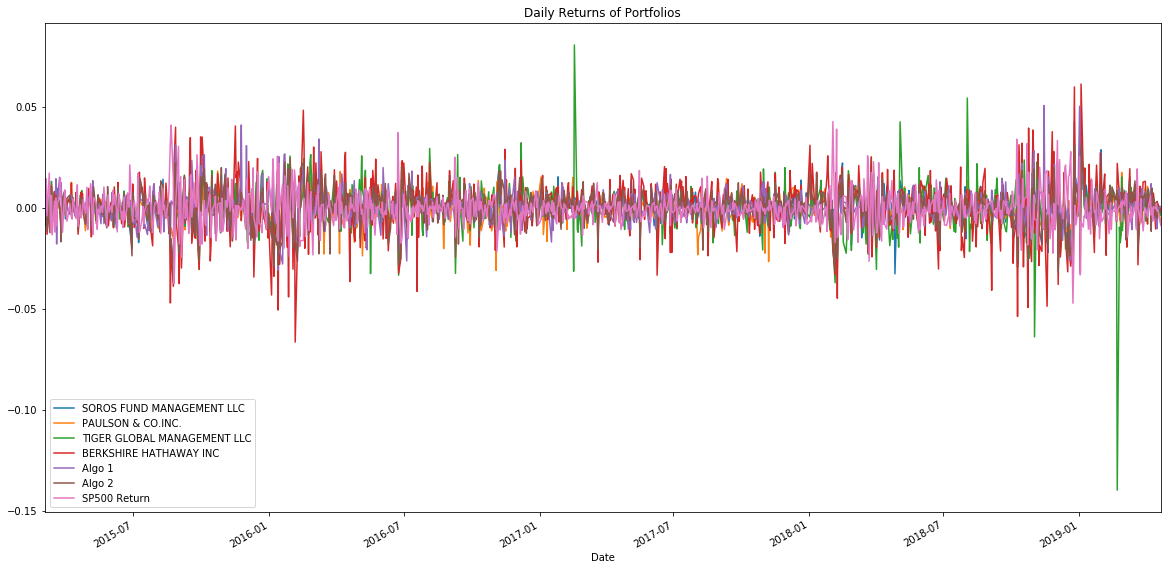

In [69]:
# Plot daily returns
portfolio_returns.plot(figsize=(20,10),title='Daily Returns of Portfolios')

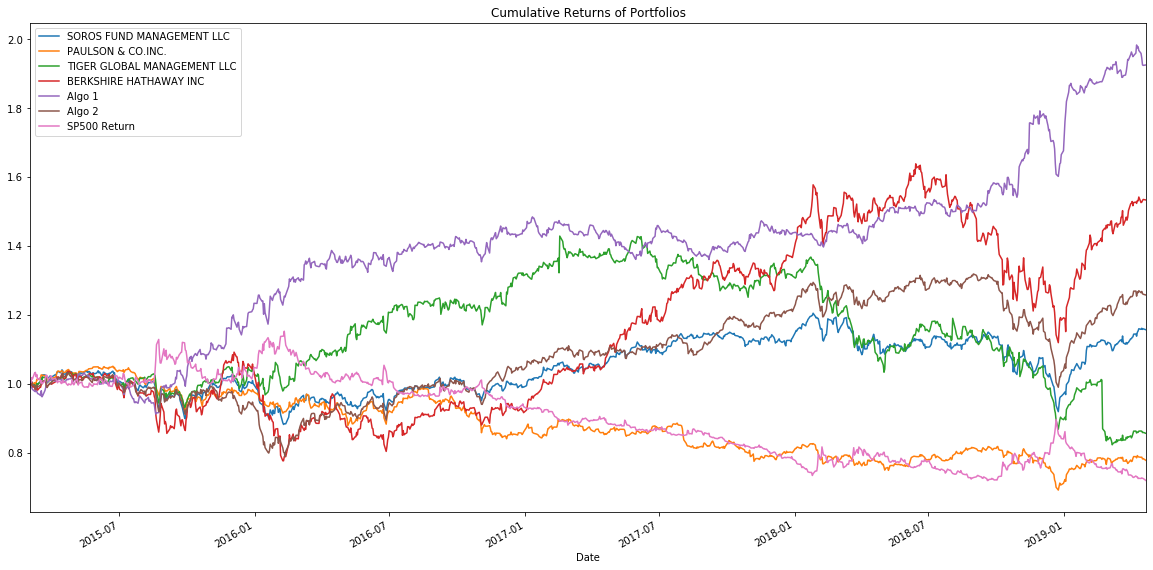

In [67]:
# Plot cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.plot(figsize=(20,10),title='Cumulative Returns of Portfolios')

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

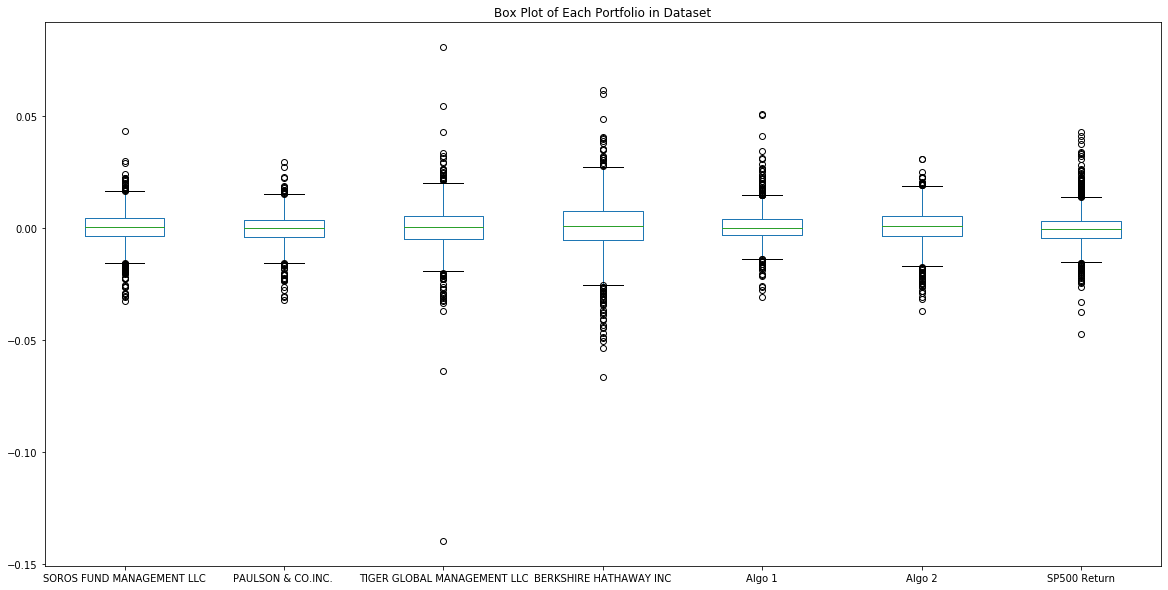

In [65]:
# Box plot to visually show risk
portfolio_returns.plot.box(figsize=(20,10),title='Box Plot of Each Portfolio in Dataset')

In [45]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
daily_std_dev = portfolio_returns.std()

# Determine which portfolios are riskier than the S&P 500
# Identify the stock with the most risk
daily_std_dev = daily_std_dev.sort_values(ascending=False)
daily_std_dev

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
SP500 Return                   0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

Higher Standard Deviation=Higher Risk
Berkshire Hathaway Inc and Tiger Global Management LLC both ahave a standard deviation
greater than the SP500 Return standard deviation. Thus, they are more risky investment portfolios than the SP500.

In [46]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_dev = daily_std_dev * np.sqrt(252)
annualized_std_dev

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
SP500 Return                   0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

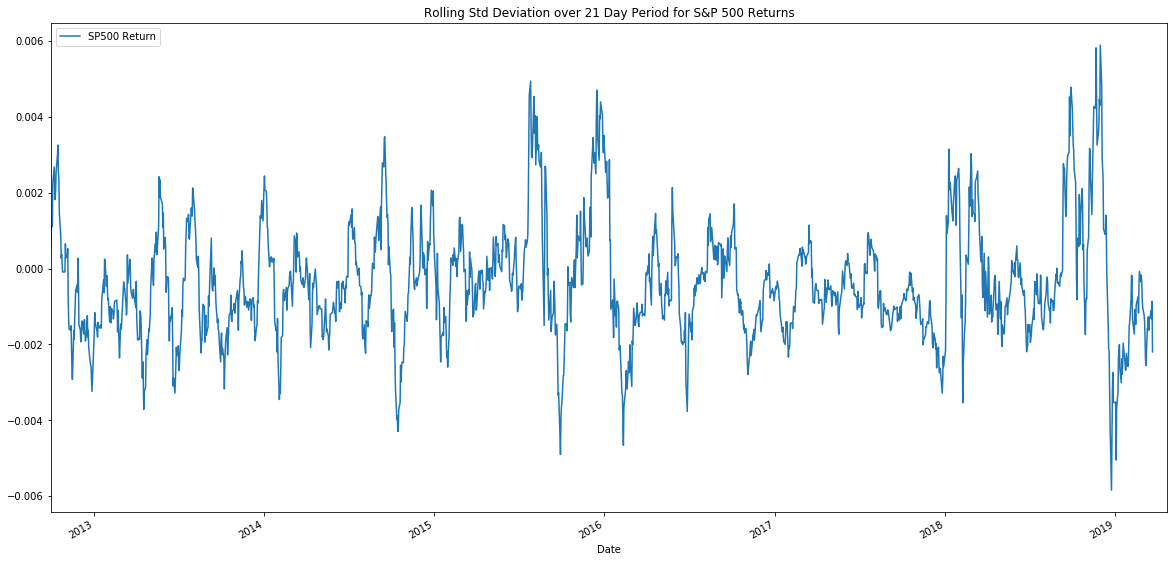

In [64]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
sp500_returns.rolling(window=21).mean().plot(figsize=(20,10),title='Rolling Std Deviation over 21 Day Period for S&P 500 Returns')

In [49]:
# Correlation
#using corr function determine correlation between all portfolios
portfolio_returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Return
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500 Return,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [62]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
#Compare Beta for Berkshire Hathway to SP500 over 60 day
#You need to calculate the covariance and variance  first to get the Beta
#Calculate the rolling Covariance over 60 day using cov and rolling function
rolling_covariance_BerkHath = portfolio_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(portfolio_returns['SP500 Return'])
rolling_covariance_BerkHath.dropna(inplace=True)
rolling_covariance_BerkHath

Date
2015-05-27    0.000004
2015-05-28    0.000004
2015-05-29    0.000004
2015-06-01    0.000003
2015-06-02    0.000002
                ...   
2019-04-15    0.000009
2019-04-16    0.000006
2019-04-17    0.000005
2019-04-18    0.000005
2019-04-22    0.000007
Length: 983, dtype: float64

In [60]:
# Calculate variance of all daily returns of Berkshire Hathway vs. S&P 500
#using var function determine variance
variance = portfolio_returns['SP500 Return'].var()
variance

7.373467552840441e-05

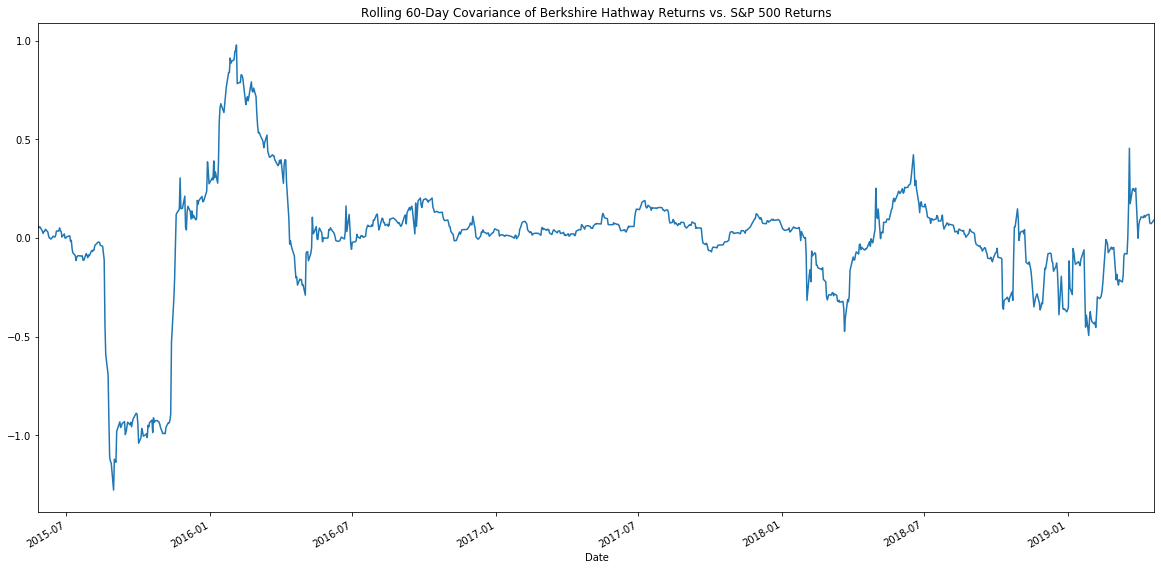

In [70]:
# Calculate beta of all daily returns of Berkshire Hathway to SP500 over 60day
rolling_beta_BerkHath = rolling_covariance_BerkHath / variance
rolling_beta_BerkHath.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Berkshire Hathway Returns vs. S&P 500 Returns')

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [24]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [25]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

In [26]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Read the first stock
# YOUR CODE HERE

In [28]:
# Read the second stock
# YOUR CODE HERE

In [29]:
# Read the third stock
# YOUR CODE HERE

In [30]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

In [31]:
# Reset the index
# YOUR CODE HERE

In [33]:
# Drop Nulls
# YOUR CODE HERE

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# YOUR CODE HERE

In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [37]:
# Risk
# YOUR CODE HERE

In [38]:
# Rolling
# YOUR CODE HERE

In [39]:
# Beta
# YOUR CODE HERE

In [40]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

In [41]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [42]:
# YOUR CODE HERE